In [2]:
#PPHA 30545 
#Machine Learning

import rpy2.robjects.packages as rpackages
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
diftrans = rpackages.importr('diftrans')
base = rpackages.importr('base')
stats = rpackages.importr('stats')

from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


## 3.2 Understanding the Data

In [3]:
# Beijing_sample = pd.read_csv('Beijing_sample.csv')
# Tianjin_sample = pd.read_csv('Tianjin_sample.csv')

Beijing_sample = base.get("Beijing_sample")
Tianjin_sample = base.get("Tianjin_sample")

## 3.3 Clean Data of Beijing and Tianjin Car Sales

In [56]:
#Exercise 3.1. For each of the following, ensure that the first column is MSRP and the second column is count.
#a. Clean data of Beijing car sales in 2011, and store the data frame in a variable called Beijing_post.
#b. Clean data of Tianjin car sales in 2010 as a variable called Tianjin_pre.
#c. Clean data of Tianjin car sales in 2011 as a variable called Tianjin_post.

#keep 2010 and 2011 data only
Beijing = Beijing_sample[(Beijing_sample['year']>= 2010) & (Beijing_sample['year'] < 2012)]
#collect unique MSRP values
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:'MSRP'})
# aggregate sales at each price for 2010 (pre-lottery)
Beijing10_sales = Beijing[(Beijing['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing10_sales = Beijing10_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing10_sales = Beijing10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
#merge the MSRP and sales
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')

Beijing11_sales = Beijing[(Beijing['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing11_sales = Beijing11_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing11_sales = Beijing11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
#merge MSRP and sales
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = 'MSRP')
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')

Tianjin = Tianjin_sample[(Tianjin_sample['year']>= 2010) & (Tianjin_sample['year'] < 2012)]
#collect unique MSRP values
uniqueMSRP = pd.DataFrame(Tianjin.MSRP.unique()).rename(columns={0:'MSRP'})
# aggregate sales at each price for 2010 (pre-lottery)
Tianjin10_sales = Tianjin[(Tianjin['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin10_sales = Tianjin10_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin10_sales = Tianjin10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
#merge the MSRP and sales
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how='left', on = "MSRP")
Tianjin_pre[['count']] = Tianjin_pre[['count']].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values('MSRP')

Tianjin11_sales = Tianjin[(Tianjin['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin11_sales = Tianjin11_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin11_sales = Tianjin11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
#merge MSRP and sales
Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how='left', on = 'MSRP')
Tianjin_post[['count']] = Tianjin_post[['count']].fillna(value=0)
Tianjin_post = Tianjin_post.sort_values('MSRP')


In [5]:
print(Beijing_pre.head(5))
print(Beijing_post.head(5))
print()
print(Tianjin_pre.head(5))
print(Tianjin_post.head(5))

      MSRP   count
482  20800     0.0
374  29800    47.0
338  32900  3153.0
227  33800  3678.0
388  34800   592.0
      MSRP   count
482  20800    23.0
374  29800     0.0
338  32900  1393.0
227  33800     4.0
388  34800   189.0

      MSRP  count
448  20800    0.0
464  28800    0.0
358  29800   51.0
494  30900    0.0
327  32900  599.0
      MSRP  count
448  20800   23.0
464  28800    7.0
358  29800    5.0
494  30900    1.0
327  32900  948.0


## 3.4 Visualize Beijing Car Sales

In [6]:
# uncount
df2 = Beijing_pre.pop('count')
Beijing_distribution_pre = pd.DataFrame(Beijing_pre.values.repeat(df2, axis=0), columns=Beijing_pre.columns)
df3 = Beijing_post.pop('count')
Beijing_distribution_post = pd.DataFrame(Beijing_post.values.repeat(df3, axis=0), columns=Beijing_post.columns)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


(0.0, 1200.0)

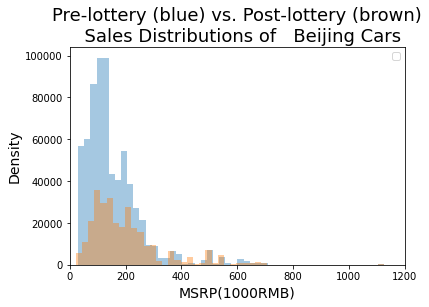

In [7]:
import seaborn as sns
fig, ax = plt.subplots() 
for a in [Beijing_distribution_pre, Beijing_distribution_post]:
    sns.distplot(a/1000, ax=ax, kde=False)
plt.xlabel("MSRP(1000RMB)", size=14) 
plt.ylabel("Density", size=14) 
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n  Sales Distributions of   Beijing Cars", size=18) 
plt.legend(loc='upper right')
ax.set_xlim([0, 1200])

In [8]:
df4 = Tianjin_pre.pop('count')
Tianjin_distribution_pre = pd.DataFrame(Tianjin_pre.values.repeat(df4, axis=0), columns=Tianjin_pre.columns)
df5 = Tianjin_post.pop('count')
Tianjin_distribution_post = pd.DataFrame(Tianjin_post.values.repeat(df5, axis=0), columns=Tianjin_post.columns)


No handles with labels found to put in legend.


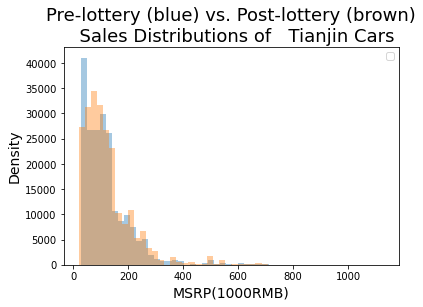

In [9]:
fig2, ax2 = plt.subplots() 
for a in [Tianjin_distribution_pre, Tianjin_distribution_post]:
    sns.distplot(a/1000, ax=ax2, kde=False)
plt.xlabel("MSRP(1000RMB)", size=14) 
plt.ylabel("Density", size=14) 
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n  Sales Distributions of   Tianjin Cars", size=18) 
plt.legend(loc='upper right')
plt.show()

## 3.5 Compute Before-and-After Estimator

In [10]:
base.set_seed(0) # for reproducibility
n_observations = 100000
placebo_demonstration = pd.DataFrame({'sample1': np.random.normal(0, 1, n_observations), 'sample2': np.random.normal(0, 1, n_observations)})
placebo_demonstration.head()

,sample1,sample2
0,1.402399,0.295899
1,0.593244,0.082860
2,0.490840,-0.079474
3,0.196674,-0.455218
4,-1.127858,1.817601


Text(0.5, 1.0, 'Two Samples from Standard Normal Distribution')

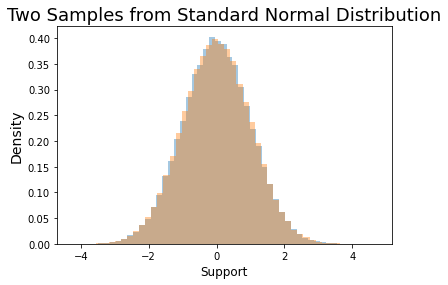

In [11]:
fig, ax = plt.subplots()
ax = sns.distplot(placebo_demonstration['sample1'], ax=ax, kde=False, norm_hist=True)
ax = sns.distplot(placebo_demonstration['sample2'], ax=ax, kde=False, norm_hist=True)
plt.xlabel("Support", size=12)
plt.ylabel("Density", size=14)
plt.title("Two Samples from Standard Normal Distribution", size=18)

In [40]:
# set the seed for reproducibility set.seed(1)
# We will use the `rmultinom` function to construct our placebo.
# Imagine the same number of cars as in 2010. (see `size` argument)
# For each MSRP value, we will decide how many of these imaginary cars will
# be sold at this price. The number of of these imaginary cars to be sold at
# the particular MSRP value will be proportional to the actual number of cars
# sold in the pre-lottery distribution. (see `prob` argument) # We only want 
# one placebo distribution. (see `n` argument) placebo_1 <- data.frame(MSRP = Beijing_pre[‘MSRP’],
base.set_seed(1)
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')
count =  stats.rmultinom(n = 1, size = sum(Beijing_pre['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_1 = pd.DataFrame(data=d)
print(placebo_1)
#print(placebo_1.dtypes)




        MSRP  count
448    20800      0
464    28800      0
358    29800     50
494    30900      0
327    32900   3136
..       ...    ...
92    698600     61
272   703600    363
218   770000     92
426   800400      3
237  1127800    324

[504 rows x 2 columns]


        MSRP  count
482    20800      0
374    29800     64
338    32900   3108
227    33800   3647
388    34800    603
..       ...    ...
263   703600    371
7     770000    103
314   800400      3
433   998000      2
5    1127800    305

[513 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [13]:
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')

In [14]:
base.set_seed(1)
count =  stats.rmultinom(n = 1, size = sum(Beijing_post['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_2 = pd.DataFrame(data=d)
print(placebo_2)
#print(placebo_2.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     17
494    30900      0
327    32900   1308
..       ...    ...
92    698600     33
272   703600    165
218   770000     41
426   800400      0
237  1127800    138

[504 rows x 2 columns]


In [18]:
placebo_at_0 = diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = 0)
placebo_at_0

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



,bandwidth,main
1,0,0.013909


R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth      main
1          0  0.013909
1         25  0.013909
1        100  0.012443
1        500  0.011387
1       1000  0.006507
1       1500  0.005513
1       1750  0.005513
1       1850  0.005435
1       1900  0.004946
1       2000  0.003268
1       5000  0.001949
1      25000  0.000609
1      30000  0.000546
1      32500  0.000542
1      40000  0.000542
1      45000  0.000542
1      50000  0.000016
1     100000  0.000011


In [15]:
cols = ['bandwidth','main']
bandwidth = []
main = []
for i in range(0, 105000, 5000):
    bandwidth.append(diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = i)['bandwidth'].values)
    main.append(diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = i)['main'].values)

placebo_transport_df = pd.DataFrame({'bandwidth': bandwidth, 'main':main})    
print(placebo_transport_df)

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth                      main
0        [0]    [0.013909162594171466]
1     [5000]   [0.0019489641981209477]
2    [10000]   [0.0007573809696677039]
3    [15000]   [0.0007316603132025103]
4    [20000]   [0.0006484126024571933]
5    [25000]   [0.0006093066340512542]
6    [30000]   [0.0005464930020972581]
7    [35000]   [0.0005421327904816576]
8    [40000]   [0.0005421327904816581]
9    [45000]   [0.0005421327904816614]
10   [50000]  [1.5670451007602535e-05]
11   [55000]  [1.5670451007602498e-05]
12   [60000]   [1.567045100760258e-05]
13   [65000]  [1.5670451007602525e-05]
14   [70000]  [1.0668323828738157e-05]
15   [75000]  [1.0668323828738157e-05]
16   [80000]  [1.0668323828738257e-05]
17   [85000]  [1.0668323828738157e-05]
18   [90000]  [1.0668323828738157e-05]
19   [95000]  [1.0668323828738157e-05]
20  [100000]  [1.0668323828738157e-05]


In [71]:

cols = ['bandwidth','main']
bandwidth2 = []
main2 = []
for i in range(0,105000, 5000):
    bandwidth2.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = i)['bandwidth'].values)
    main2.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = i)['main'].values)

empirical_transport_df = pd.DataFrame({'bandwidth': bandwidth2, 'main':main2})    
print(placebo_transport_df)


R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth                      main
0        [0]    [0.013909162594171466]
1     [5000]   [0.0019489641981209477]
2    [10000]   [0.0007573809696677039]
3    [15000]   [0.0007316603132025103]
4    [20000]   [0.0006484126024571933]
5    [25000]   [0.0006093066340512542]
6    [30000]   [0.0005464930020972581]
7    [35000]   [0.0005421327904816576]
8    [40000]   [0.0005421327904816581]
9    [45000]   [0.0005421327904816614]
10   [50000]  [1.5670451007602535e-05]
11   [55000]  [1.5670451007602498e-05]
12   [60000]   [1.567045100760258e-05]
13   [65000]  [1.5670451007602525e-05]
14   [70000]  [1.0668323828738157e-05]
15   [75000]  [1.0668323828738157e-05]
16   [80000]  [1.0668323828738257e-05]
17   [85000]  [1.0668323828738157e-05]
18   [90000]  [1.0668323828738157e-05]
19   [95000]  [1.0668323828738157e-05]
20  [100000]  [1.0668323828738157e-05]


In [72]:
cols = ['bandwidth','main']
bandwidth2 = []
main2 = []
for i in range(0,105000, 5000):
    bandwidth2.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = i)['bandwidth'].values)
    main2.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = i)['main'].values)

empirical_transport_df = pd.DataFrame({'bandwidth': bandwidth2, 'main':main2})    
print(empirical_transport_df)


R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth                    main
0        [0]   [0.35312341198976444]
1     [5000]   [0.17785942748226927]
2    [10000]   [0.15183080916094385]
3    [15000]   [0.13805857605749003]
4    [20000]   [0.12315956106076102]
5    [25000]   [0.10076861095451133]
6    [30000]   [0.08807505784276998]
7    [35000]   [0.07725061893640303]
8    [40000]   [0.06488865219442809]
9    [45000]   [0.05525307829038914]
10   [50000]  [0.053762156781739324]
11   [55000]   [0.05375779736212339]
12   [60000]   [0.05126130306206454]
13   [65000]   [0.05068876595250505]
14   [70000]   [0.04098760416717745]
15   [75000]   [0.04081468052241197]
16   [80000]  [0.039060507085339355]
17   [85000]   [0.03895175520653571]
18   [90000]  [0.030705186433058418]
19   [95000]  [0.028104066062217124]
20  [100000]  [0.027120290368887762]


bandwidth    float64
main         float64
dataset       object
dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

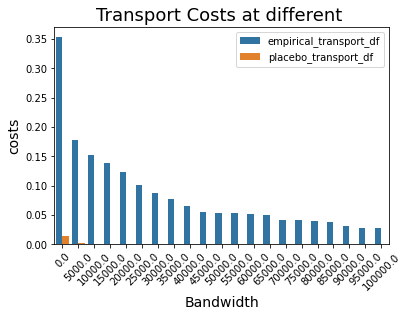

In [38]:
transport_costs = pd.concat([empirical_transport_df.assign(dataset='empirical_transport_df'), placebo_transport_df.assign(dataset = 'placebo_transport_df')])
transport_costs[['bandwidth','main']] = transport_costs[['bandwidth','main']].astype(float)
#print(transport_costs.dtypes)
sns.barplot(x = "bandwidth", y = "main", data = transport_costs, hue='dataset')
plt.xlabel("Bandwidth", size=14) 
plt.ylabel("costs", size=14) 
plt.title("Transport Costs at different ", size=18) 
plt.legend(loc='upper right')
plt.xticks(rotation=45)

## 3.6 Compute Differences-in-Transports Estimator

In [46]:
dit_at_0 = diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = 0, conservative = True)
print(dit_at_0)
#3.5
#a

cols = ['bandwidth','main','main2d','control','diff','diff2d']
bandwidth3 = []
main3 = []
main2d = []
control = []
diff = []
diff2d = []

for i in range(0,52500, 2500):
    bandwidth3.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['bandwidth'].values)
    main3.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['main'].values)
    main2d.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['main2d'].values)
    control.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['control'].values)
    diff.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['diff'].values)
    diff2d.append(diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = i, conservative = True)['diff2d'].values)

placebo_dit_df = pd.DataFrame({'bandwidth': bandwidth3, 'main':main3, 'main2d':main2d, 'control':control, 'diff':diff,'diff2d':diff2d})    
placebo_dit_df = placebo_dit_df.astype(float)

print(placebo_dit_df)


R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



   bandwidth      main    main2d   control      diff    diff2d
1          0  0.353123  0.353123  0.298681  0.054443  0.054443


R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0544428953078284 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0742401997649757 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.112864303681836 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.103066251842703 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0823308017175935 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0702368436954648 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0594297496394118 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0518327480602116 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0478479280287894 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0466037451218086 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0465993857021926 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0444204682876817 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0440262213349769 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343250595496492 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0341521359048838 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0326836200370105 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0343759633402772 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0263858480305424 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0237944109671316 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0228106352738022 at d = 50000



    bandwidth      main    main2d   control      diff    diff2d
0         0.0  0.353123  0.353123  0.298681  0.054443  0.054443
1      2500.0  0.215985  0.177859  0.103619  0.112366  0.074240
2      5000.0  0.177859  0.151831  0.045617  0.132243  0.106214
3      7500.0  0.169615  0.138059  0.025194  0.144421  0.112864
4     10000.0  0.151831  0.123160  0.020093  0.131737  0.103066
5     12500.0  0.148234  0.100769  0.018438  0.129796  0.082331
6     15000.0  0.138059  0.088075  0.017838  0.120220  0.070237
7     17500.0  0.130099  0.077251  0.017821  0.112278  0.059430
8     20000.0  0.123160  0.064889  0.013056  0.110104  0.051833
9     22500.0  0.115663  0.055253  0.007405  0.108258  0.047848
10    25000.0  0.100769  0.053762  0.007158  0.093610  0.046604
11    27500.0  0.095018  0.053758  0.007158  0.087859  0.046599
12    30000.0  0.088075  0.051261  0.006841  0.081234  0.044420
13    32500.0  0.081166  0.050689  0.006663  0.074504  0.044026
14    35000.0  0.077251  0.040988  0.006

In [62]:
#3.5b
base.set_seed(0)

count =  stats.rmultinom(n = 1, size = sum(Beijing_pre['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_Beijing_1 = pd.DataFrame(data=d)
print(placebo_1)
#print(placebo_1.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     50
494    30900      0
327    32900   3136
..       ...    ...
92    698600     61
272   703600    363
218   770000     92
426   800400      3
237  1127800    324

[504 rows x 2 columns]


In [63]:
#3.5 c
count =  stats.rmultinom(n = 1, size = sum(Beijing_post['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_Beijing_2 = pd.DataFrame(data=d)
print(placebo_Beijing_2)
#print(placebo_Beijing_2.dtypes)

        MSRP  count
482    20800      0
374    29800     17
338    32900   1332
227    33800   1523
388    34800    249
..       ...    ...
263   703600    144
7     770000     41
314   800400      0
433   998000      2
5    1127800    126

[513 rows x 2 columns]


In [64]:
base.set_seed(0)

Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how='left', on = "MSRP")
Tianjin_pre[['count']] = Tianjin_pre[['count']].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values('MSRP')
#Tianjin_pre

In [65]:
#3.5d

count =  stats.rmultinom(n = 1, size = sum(Tianjin_pre['count']), prob = Tianjin_pre['count'])
count2 = count[:,0]
d = {'MSRP': Tianjin_pre['MSRP'], 'count' : count2}
placebo_Tianjin_1 = pd.DataFrame(data=d)
print(placebo_Tianjin_1)
#print(placebo_Tianjin_1.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     54
494    30900      0
327    32900    633
..       ...    ...
92    698600      7
272   703600     33
218   770000      3
426   800400      1
237  1127800     14

[504 rows x 2 columns]


In [66]:
#3.5e
count =  stats.rmultinom(n = 1, size = sum(Tianjin_post['count']), prob = Tianjin_pre['count'])
count2 = count[:,0]
d = {'MSRP': Tianjin_pre['MSRP'], 'count' : count2}
placebo_Tianjin_2 = pd.DataFrame(data=d)
print(placebo_Tianjin_2)
#print(placebo_Tianjin_1.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     62
494    30900      0
327    32900    651
..       ...    ...
92    698600     25
272   703600     35
218   770000      2
426   800400      2
237  1127800     12

[504 rows x 2 columns]


In [68]:
#3.5f
#
cols = ['bandwidth','main']
bandwidth = []
main = []

for i in range(0,50000,2500):
    bandwidth.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['bandwidth'].values)

    
dit_at_16666 = diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = 16666, conservative = True)
print(dit_at_16666)
dit_at_33333 = diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = 33333, conservative = True)
print(dit_at_33333)
dit_at_50000 = diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = 50000, conservative = True)
print(dit_at_50000)


cols = ['bandwidth','main','main2d','control','diff','diff2d']
bandwidth3 = []
main3 = []
main2d = []
control = []
diff = []
diff2d = []

for i in range(0,52500, 2500):
    bandwidth3.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['bandwidth'].values)
    main3.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['main'].values)
    main2d.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['main2d'].values)
    control.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['control'].values)
    diff.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['diff'].values)
    diff2d.append(diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = i, conservative = True)['diff2d'].values)

three_five_g = pd.DataFrame({'bandwidth': bandwidth3, 'main':main3, 'main2d':main2d, 'control':control, 'diff':diff,'diff2d':diff2d})    
three_five_g = three_five_g.astype(float)


R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000389956236188094 at d = 16666

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



   bandwidth      main    main2d   control      diff   diff2d
1      16666  0.000608  0.000388  0.000778 -0.000171 -0.00039


R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628548 at d = 33333

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



   bandwidth      main    main2d   control      diff    diff2d
1      33333  0.000388  0.000007  0.000192  0.000197 -0.000185


R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



   bandwidth      main    main2d   control      diff    diff2d
1      50000  0.000022  0.000007  0.000018  0.000005 -0.000011


R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00591251569658268 at d = 0

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00297186663559589 at d = 2500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00112372236251653 at d = 5000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000898643623997678 at d = 7500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000300565509129149 at d = 10000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00041780053039524 at d = 12500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000470113565786455 at d = 15000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000301210220071374 at d = 17500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000297964815598482 at d = 20000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000253484861864084 at d = 22500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533162 at d = 25000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000192690794533165 at d = 27500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000177660392250676 at d = 30000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00016949340823046 at d = 32500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628552 at d = 35000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.00018519780862855 at d = 37500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628554 at d = 40000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628557 at d = 42500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -0.000185197808628551 at d = 45000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 47500

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is -1.10233597517788e-05 at d = 50000



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

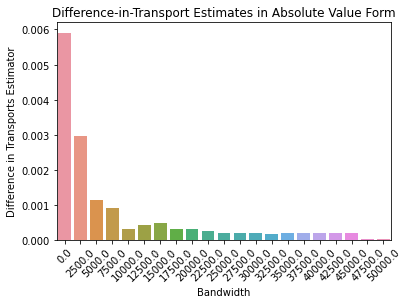

In [70]:
#3.5g

three_five_g['Dif-In-Transports'] = np.abs(three_five_g['diff2d'])
#print(three_five_g)
ax = sns.barplot(x = 'bandwidth', y = 'Dif-In-Transports', data = three_five_g)
plt.xlabel('Bandwidth')
plt.ylabel('Difference in Transports Estimator')
plt.title('Difference-in-Transport Estimates in Absolute Value Form')
plt.xticks(rotation=45)

In [76]:
#three_five_h
three_five_h = three_five_g[['bandwidth','main','Dif-In-Transports']]
print(three_five_h)

    bandwidth      main  Dif-In-Transports
0         0.0  0.012020           0.005913
1      2500.0  0.003116           0.002972
2      5000.0  0.001905           0.001124
3      7500.0  0.000632           0.000899
4     10000.0  0.000611           0.000301
5     12500.0  0.000608           0.000418
6     15000.0  0.000608           0.000470
7     17500.0  0.000608           0.000301
8     20000.0  0.000608           0.000298
9     22500.0  0.000608           0.000253
10    25000.0  0.000445           0.000193
11    27500.0  0.000445           0.000193
12    30000.0  0.000393           0.000178
13    32500.0  0.000388           0.000169
14    35000.0  0.000388           0.000185
15    37500.0  0.000388           0.000185
16    40000.0  0.000388           0.000185
17    42500.0  0.000388           0.000185
18    45000.0  0.000388           0.000185
19    47500.0  0.000022           0.000011
20    50000.0  0.000022           0.000011
